# Multiple Regression

Suppose an experiment involves two independent variables - say, $u$ and $v$ - and one dependent variable, $y$. A simple equation for predicting $y$ from $u$ and $v$ has the form

$$y = β_0 + β_1 u + β_2v \ \ \ (1)$$

A more general prediction equation might have the form

$$y = β_0 + β_1u + β_2v + β_3v^2 + β_4uv + β_5v^2 \ \ \ (2)$$

This equation is used in geology, for instance, to model erosion surfaces, glacial cirques, soil pH, and other quantites. In such cases, the least-squares fit is called a *trend surface*. In general, a linear model will arise whenver $y$ is to be predicted by an equation of the form

$$y = β_0f_0(u, v) + β_1f_1(u, v) + \cdot \cdot \cdot + β_kf_k(u,v) \ \ \ (3)$$

with $f_0,...,f_k$ any sort of known functions and $β_0,...,β_k$ unknown weight.

# Example

In geography, local models of terrain are constructed from data $(u_1, v_1, y_1),...,(u_n, v_n, y_n)$, where $u_j$, $v_j$, and $y_j$ are latitude, longitude, and altitude, respecticely. The linear model based on equation (1) gives a solution to such data. The solution is called the *least-squares plane*.

We expect the data to satisft the following
equations:

$$y_1 = β_0 + β_1 u_1 + β_2v_1 + ϵ_1$$
$$y_1 = β_0 + β_2 u_2 + β_2v_2 + ϵ_2$$
$$\vdots$$
$$y_n = β_0 + β_1 u_n + β_2v_n + ϵ_n$$

This system has the matrix form $\textbf{y}=X \textbf{β} + \textbf{ϵ}$, where


$$
\textbf{y} = \begin{bmatrix}
y_1  \\
y_2  \\
\vdots \\
y_n
\end{bmatrix},
\quad
X = \begin{bmatrix}
1  & u_1 & v_1\\
1 & u_2 & v_2 \\
\vdots& \vdots & \vdots \\
1 & u_n & v_n
\end{bmatrix},
\quad
\textbf{β}=\begin{bmatrix}
β_0  \\
β_1  \\
β_2
\end{bmatrix},
\quad
\textbf{ϵ}=\begin{bmatrix}
ϵ_1  \\
ϵ_2  \\
\vdots \\
ϵ_n
\end{bmatrix}
$$

$\widehat{\beta}$ is given by $(X^TX)^{-1}X^T\textbf{y}$



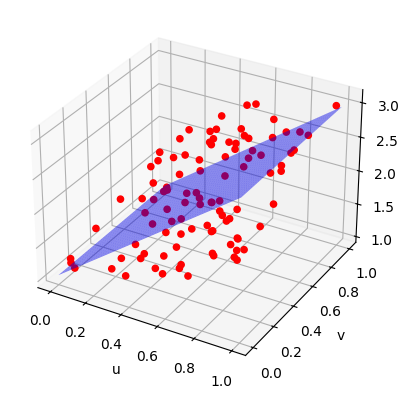

In [ ]:
# import libraries
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np


# generate random data with 'Gaussian noise', which introduces random variance
# so that our data isn't just a straight line.

u = np.random.random(100)
v = np.random.random(100)
y = 1 + u + v + np.random.normal(0, 0.1, len(u))

# a numerical least-squares / multiple linear regresision function
def least_squares(u, v, y):

  ones = np.ones(100) # we need to have a vector of ones in the first column.

  X = np.matrix([ones, u, v]).T # the design matrix, X
  XT_X = X.T * X
  XT_y = X.T * y.reshape(100,1)

  beta = np.linalg.inv(XT_X) * XT_y # computers beta parameters
  return beta


beta = least_squares(u, v, y)

u_range = np.linspace(0, 1, 100)
v_range = np.linspace(0, 1, 100)

# objective function 'f'
def f(u, v, beta):

  return beta[0] + beta[1] * u + beta[2] * v

# generate predictions
y_hat = f(u_range, v_range, beta)

fig = plt.figure()
ax = fig.add_subplot(111,  projection='3d')
ax.scatter(u, v, y, color='red', alpha=1)
U, V = np.meshgrid(u_range, v_range)
ax.plot_surface(U, V, y_hat, color='blue', alpha=0.5)
ax.set_xlabel('u')
ax.set_ylabel('v')
ax.set_zlabel('y')
plt.show()

# Authored by Logan Kronforst, examples used from Linear Algebra and Its Applications 5th edition by Lay. A great book highly recommend for understanding linear algebra deeply.